#### HW 2 Solution

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

In [3]:
# Read in the dataset
df = pd.read_csv('hw2_dataset.csv')

# Separate into features and labels
X = df.drop('label',axis=1)
y = df['label']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Display

print(df)

           X1        X2  label
0    0.550311 -1.059195      1
1    0.185336 -1.080643      1
2   -0.457508 -0.057527      1
3   -0.092201  1.156747      0
4    0.837751 -1.020240      1
..        ...       ...    ...
995  1.666869 -0.287743      0
996 -0.031018  1.825730      0
997 -0.755867  1.298151      0
998  0.430122 -1.177174      1
999  0.940453  0.042234      0

[1000 rows x 3 columns]


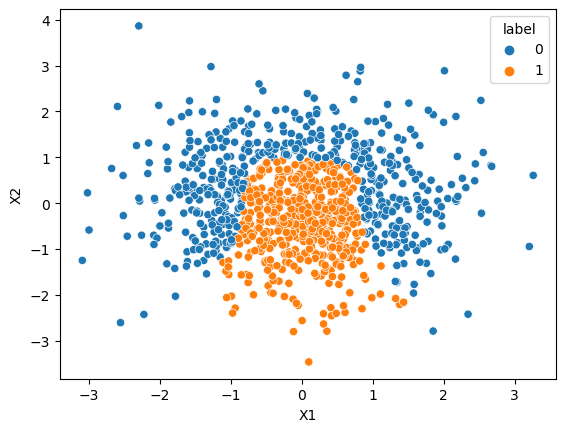

In [6]:
# Plot a scatter plot and visaulize the dataset with the classes colored
# You can then visualize the possible decision boundary

sns.scatterplot(X,x=X['X1'],y=X['X2'],hue=y)
plt.show()

In [7]:
# Create a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
l_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(l_pred,y_test)*100}%\n\n Confusion Matrix\n{confusion_matrix(l_pred,y_test)}")

Accuracy: 61.5%

 Confusion Matrix
[[52 39]
 [38 71]]


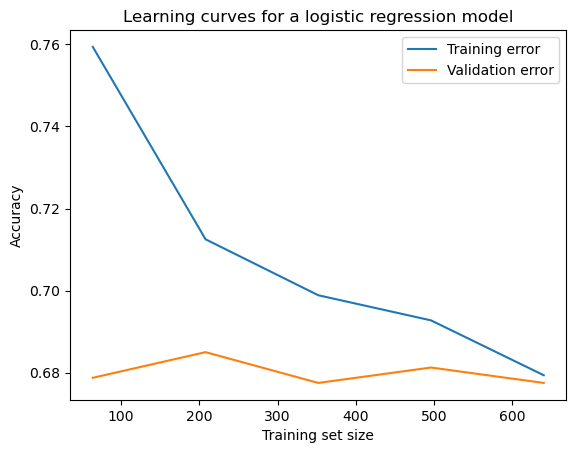

In [8]:
# Plot learning curves
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, valid_scores_mean, label='Validation error')
plt.title('Learning curves for a logistic regression model')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

C:\Users\raoji\miniconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


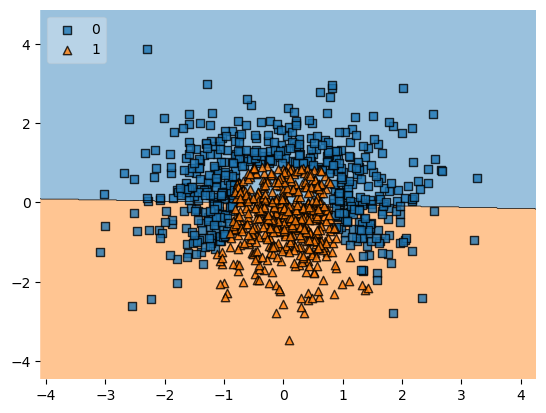

In [9]:
# Decision boundary
plot_decision_regions(np.array(X), np.array(y), clf=model, legend=2)
plt.show()

Answers to questions in pt.5 and pt.6 of HW instructions:

1. Learning curve tells us that the bias is high and variance is low. Hence, it is underfitting.

2. The decision boundary shows us that logistic regression uses a line as the decision boundary whereas the plot shows it is a non-linear decision boundary.

3. If we are forced to use LogisticRegression, we will have to introduce additional features of higher order polynomials, to get a higher accuracy.

In [10]:
# RandomForestClassifier
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best parameters for RandomForestClassifier: ', grid_search.best_params_)

# Predict on teset set
r_pred = grid_search.predict(X_test)

print(f"Accuracy: {accuracy_score(r_pred,y_test)*100}%\n\n Confusion Matrix\n{confusion_matrix(r_pred,y_test)}")

Best parameters for RandomForestClassifier:  {'max_depth': None, 'n_estimators': 100}
Accuracy: 98.5%

 Confusion Matrix
[[ 90   3]
 [  0 107]]


In [11]:
# SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(random_state=0), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best parameters for SVM: ', grid_search.best_params_)

# Predict on teset set
s_pred = grid_search.predict(X_test)

print(f"Accuracy: {accuracy_score(s_pred,y_test)*100}%\n\n Confusion Matrix\n{confusion_matrix(s_pred,y_test)}")

Best parameters for SVM:  {'C': 10, 'kernel': 'rbf'}
Accuracy: 96.5%

 Confusion Matrix
[[ 87   4]
 [  3 106]]


C:\Users\raoji\miniconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


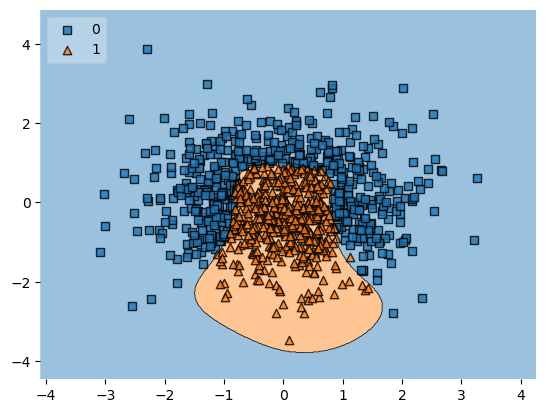

In [12]:
# Decision boundary
plot_decision_regions(np.array(X), np.array(y), clf=grid_search, legend=2)
plt.show()

In [15]:
# Separate SVC model 

svc = SVC(C=0.0001,random_state=0)

svc.fit(X_train,y_train)

preds = svc.predict(X_test)

print(f"Accuracy of this model: {accuracy_score(preds,y_test)*100}%")

Accuracy of this model: 45.0%


Answers to questions:

Q1.

    - Learning curve tells us whether the model has a bias or variance issue and based on that we can take decisons on the next step. 
    
    - Decision boundaries give us an idea of how the classes in the data are separated and what our model is creating. This gives us an idea whether our model is able to find the best decision boundary or if it needs more tweaking or a change in the algorithm being used. Clearly, RandomForest and SVM are able to work with the non-linear separation in the data and build good decision boundaries.
    
    - Confusion matrix gives us a deeper insight into where the errors are occuring and how serious their implications could be for the given application. Actions can be take to minimize that effect.
    
    
Q2. 

The accuracy I got is 46%. The reason for this low accuracy is that we have given more emphasis to the "regularization term" of the cost function by choosing a very small value of C. The value is so small that the model reduces the values of the "theta" coefficients more than required and that results in the model underfitting. The large margin classifier accomodates too many misclassifications would be the other way to put it.